#### 2.1. Обучение моделей из sklearn для решения задачи регрессии и оценка качества по выбранным метрикам.

0. Подключим необходимые модули

In [581]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

1. Загрузим датасет и посмотрим, что он из себя представляет

In [582]:
honey_df = pd.read_csv("datasets/honey_purity_dataset.csv")
# Т.к. датасет большой (247903 строк), то уменьшим их количество для ускорения обучения (может влиять на качество).
honey_df = honey_df.sample(n=10000, random_state=42)
honey_df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
29002,7.73,1.45,15.07,7.42,0.76,26.78,24.60,Lavender,6395.02,0.64,384.48
13563,6.49,1.61,20.81,7.27,0.74,31.43,27.41,Wildflower,6565.61,0.99,319.27
12445,2.70,1.64,12.85,3.58,0.70,34.54,27.17,Eucalyptus,7176.79,0.84,584.69
233689,8.39,1.55,14.51,5.34,0.77,33.67,23.27,Borage,2152.04,0.63,469.07
52643,8.28,1.46,13.56,4.61,0.77,35.10,43.78,Alfalfa,6417.87,0.82,353.38


Посмотрим информацию о датасете

In [583]:
print(honey_df.info())
honey_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 29002 to 173898
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CS               10000 non-null  float64
 1   Density          10000 non-null  float64
 2   WC               10000 non-null  float64
 3   pH               10000 non-null  float64
 4   EC               10000 non-null  float64
 5   F                10000 non-null  float64
 6   G                10000 non-null  float64
 7   Pollen_analysis  10000 non-null  object 
 8   Viscosity        10000 non-null  float64
 9   Purity           10000 non-null  float64
 10  Price            10000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 937.5+ KB
None


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.497162,1.534781,18.508483,5.000816,0.800295,34.907651,32.467426,5748.765549,0.824445,592.576219
std,2.591134,0.188722,3.768109,1.441202,0.057393,8.594464,7.236013,2462.012776,0.139502,232.493006
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.010000,1500.920000,0.610000,128.720000
25%,3.280000,1.370000,15.200000,3.750000,0.750000,27.530000,26.357500,3605.747500,0.660000,432.620000
50%,5.490000,1.530000,18.520000,5.000000,0.800000,34.930000,32.320000,5734.230000,0.820000,610.580000
75%,7.740000,1.700000,21.780000,6.240000,0.850000,42.232500,38.842500,7860.610000,0.970000,769.550000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.280000,1.000000,976.690000


Посмотрим сколько у нас null столбцев

In [584]:
honey_df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

Посмотрим сколько у нас повторяющихся строк

In [585]:
honey_df.duplicated().sum()

np.int64(0)

Посмотрим информацию о категориальных данных

In [586]:
print(honey_df['Pollen_analysis'].value_counts())

Pollen_analysis
Lavender          571
Sage              566
Eucalyptus        564
Sunflower         554
Alfalfa           543
Heather           540
Tupelo            533
Clover            532
Avocado           523
Acacia            523
Buckwheat         522
Orange Blossom    516
Wildflower        512
Rosemary          511
Borage            510
Thyme             508
Chestnut          505
Blueberry         488
Manuka            479
Name: count, dtype: int64


2. Сделаем минимально необходимую обработку и обучим модели: 

In [587]:

pollen_analysis = pd.get_dummies(honey_df['Pollen_analysis'], drop_first=True)

onehot_honey_df = pd.concat([honey_df.drop('Pollen_analysis', axis=1), pollen_analysis], axis=1)


onehot_honey_df.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Heather,Lavender,Manuka,Orange Blossom,Rosemary,Sage,Sunflower,Thyme,Tupelo,Wildflower
29002,7.73,1.45,15.07,7.42,0.76,26.78,24.60,6395.02,0.64,384.48,...,False,True,False,False,False,False,False,False,False,False
13563,6.49,1.61,20.81,7.27,0.74,31.43,27.41,6565.61,0.99,319.27,...,False,False,False,False,False,False,False,False,False,True
12445,2.70,1.64,12.85,3.58,0.70,34.54,27.17,7176.79,0.84,584.69,...,False,False,False,False,False,False,False,False,False,False
233689,8.39,1.55,14.51,5.34,0.77,33.67,23.27,2152.04,0.63,469.07,...,False,False,False,False,False,False,False,False,False,False
52643,8.28,1.46,13.56,4.61,0.77,35.10,43.78,6417.87,0.82,353.38,...,False,False,False,False,False,False,False,False,False,False


Разделим датафрейм на features и target, а также train и test

In [588]:
honey_X = onehot_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = onehot_honey_df[['Purity', 'Price']]

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [589]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor


scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = KNeighborsRegressor()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)


Результаты кросс-валидации для Purity модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.007553    0.066076  KNeighborsRegressor()     -0.023554      -0.153472   
1  0.014580    0.064750  KNeighborsRegressor()     -0.024016      -0.154972   
2  0.003978    0.070117  KNeighborsRegressor()     -0.023314      -0.152688   
3  0.003520    0.066015  KNeighborsRegressor()     -0.023389      -0.152933   
4  0.003673    0.063946  KNeighborsRegressor()     -0.022645      -0.150482   

   test_neg_mae   test_r2  
0     -0.131719 -0.228467  
1     -0.134069 -0.224426  
2     -0.131735 -0.186747  
3     -0.132336 -0.198421  
4     -0.129536 -0.171009  


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Price модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.003314    0.072427  KNeighborsRegressor() -62878.308844    -250.755476   
1  0.004048    0.062116  KNeighborsRegressor() -64480.636245    -253.930377   
2  0.004059    0.063488  KNeighborsRegressor() -62237.822989    -249.475095   
3  0.003817    0.066246  KNeighborsRegressor() -66294.746071    -257.477661   
4  0.004887    0.062429  KNeighborsRegressor() -66918.329246    -258.685773   

   test_neg_mae   test_r2  
0   -206.227366 -0.168469  
1   -207.554816 -0.218517  
2   -205.583506 -0.194027  
3   -211.341691 -0.218341  
4   -214.310029 -0.180383  


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [590]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: -0.11477056946853548
mse: 0.02157792008
rmse: 0.1468942479472903
mae: 0.1274826

Test_score Price:
r2: -0.14823846826088594
mse: 62222.7323332984
rmse: 249.44484827973176
mae: 205.3528756


| Метрика | Purity               | Price                 |
|---------|----------------------|-----------------------|
| r2      | -0.05486133154132711 | -0.11933013684360216  |
| mse     | 0.020431725995038418 | 60911.8844372181      |
| rmse    | 0.14293958862064218  | 246.80333149537933    |
| mae     | 0.1230336378854803   | 201.98818649079283    |

### 3. Улучшение бейзлайна

#### 3.2. Задача регрессии

Проведем более детальный анализ датасета

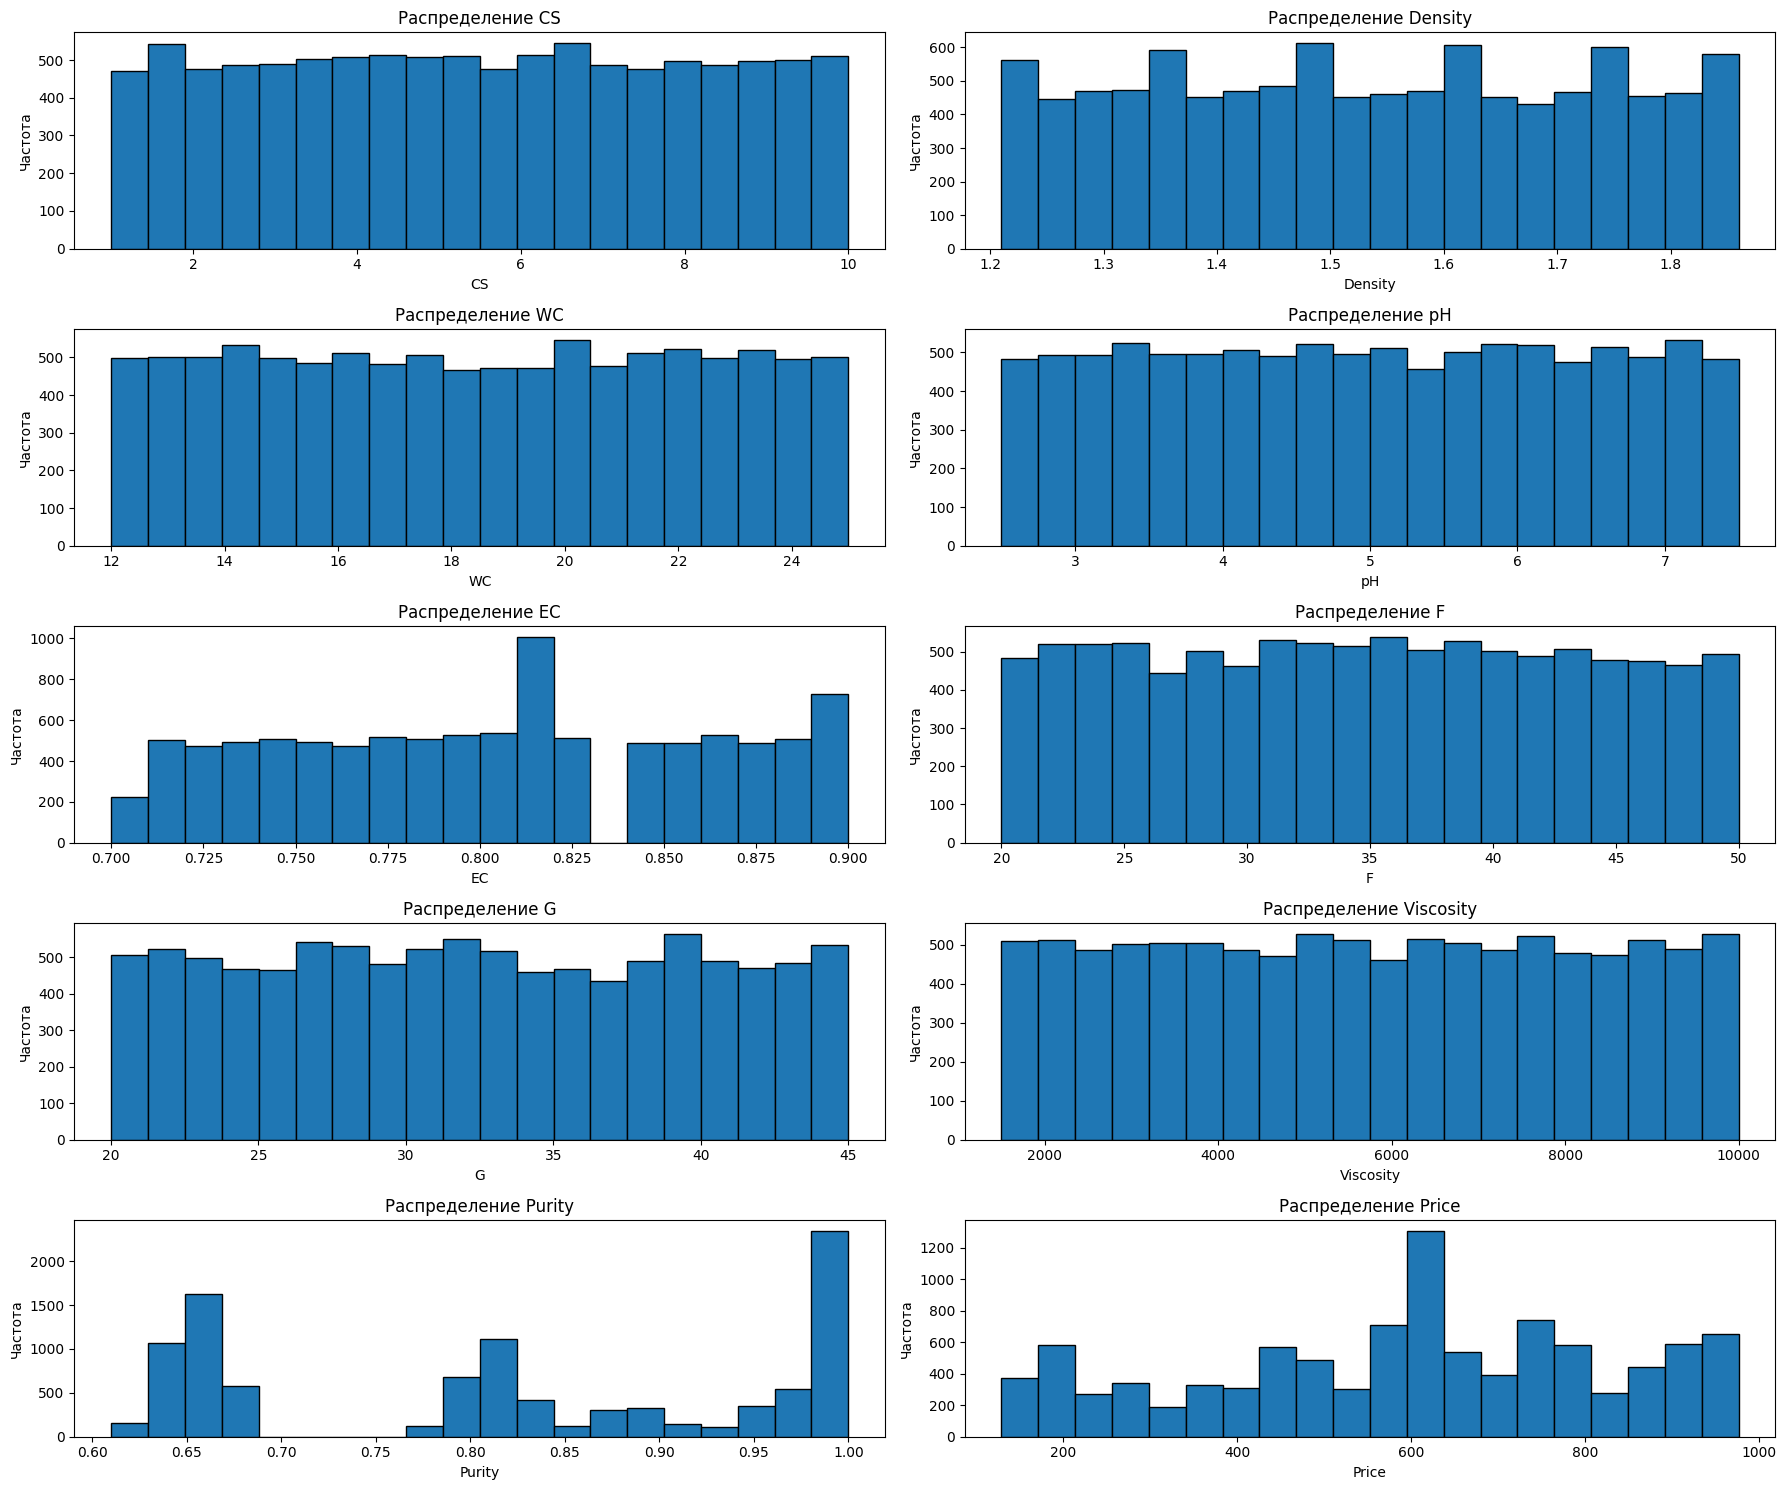

In [591]:
from matplotlib import pyplot as plt


num_cols = ['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity', 'Purity', 'Price']
cat_cols = ['Pollen_analysis']

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    axes[i].hist(honey_df[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Посмотрим есть ли выбросы

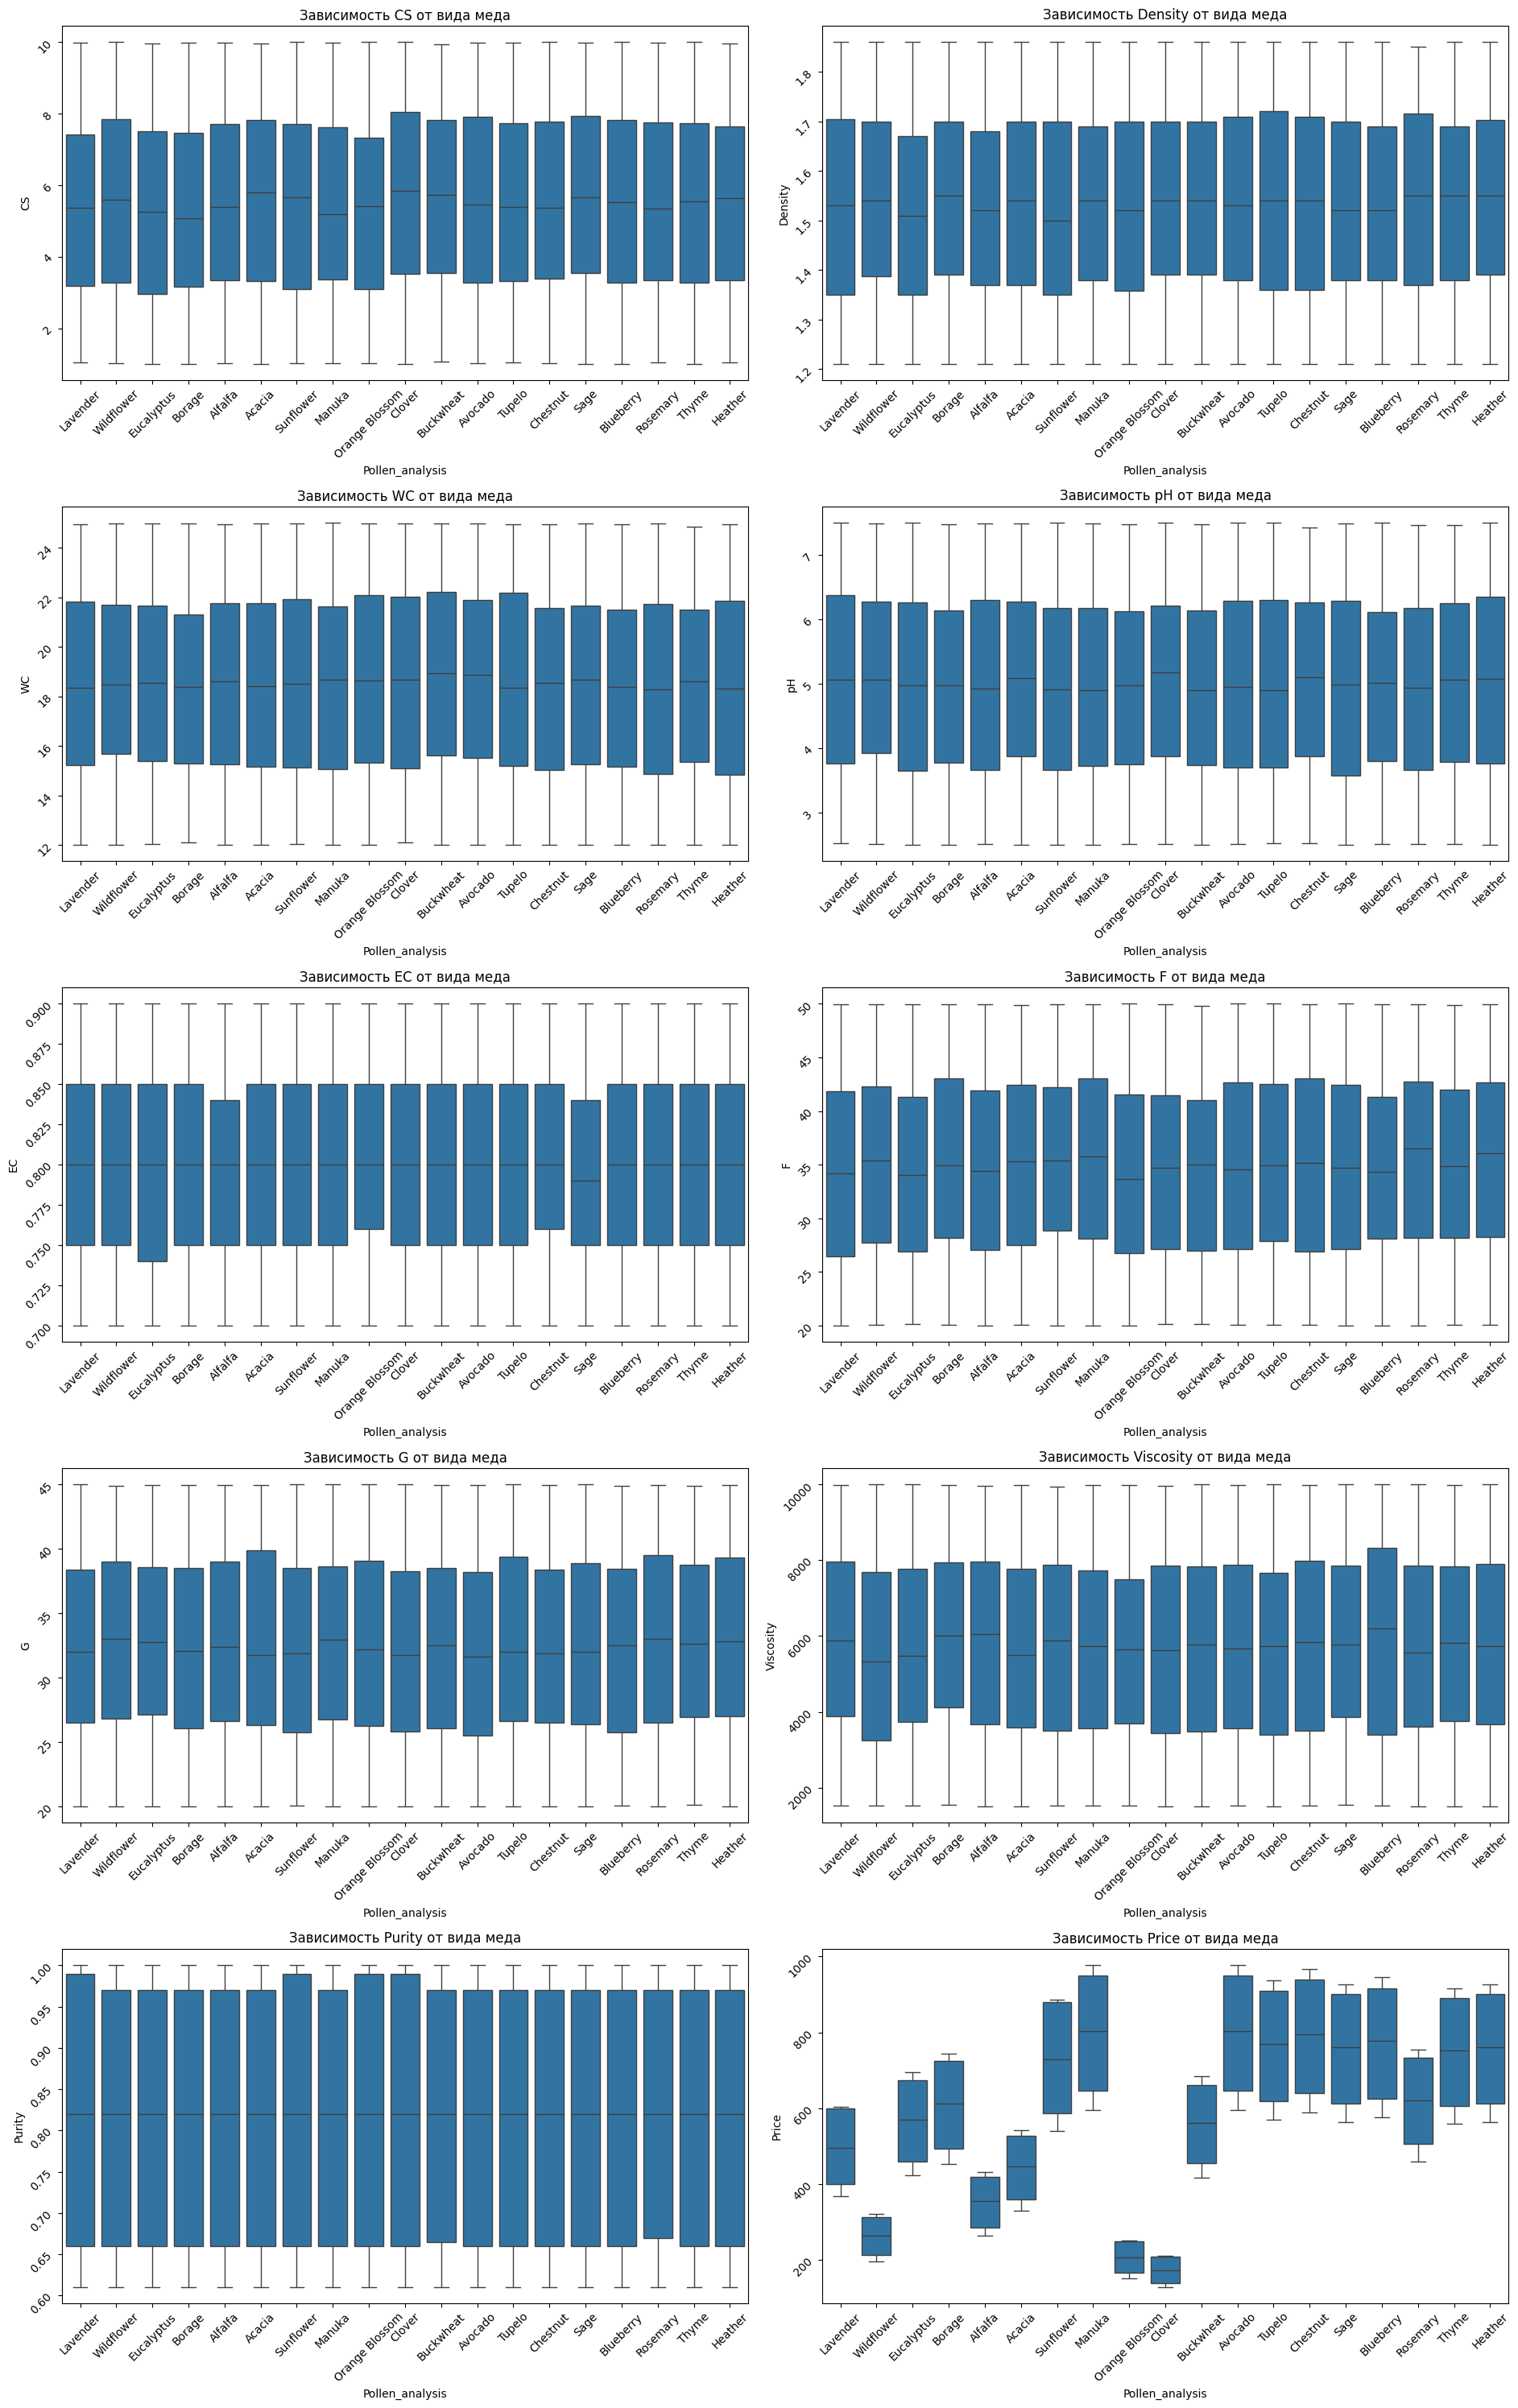

In [592]:
import seaborn as sns


fig, axes = plt.subplots(5, 2, figsize=(19, 30))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Pollen_analysis', y=col, data=honey_df, ax=axes[i])
    axes[i].set_title(f'Зависимость {col} от вида меда')
    axes[i].tick_params(rotation=45)

plt.tight_layout()
plt.show()

Выбросов нет

Посмотрим корреляцию

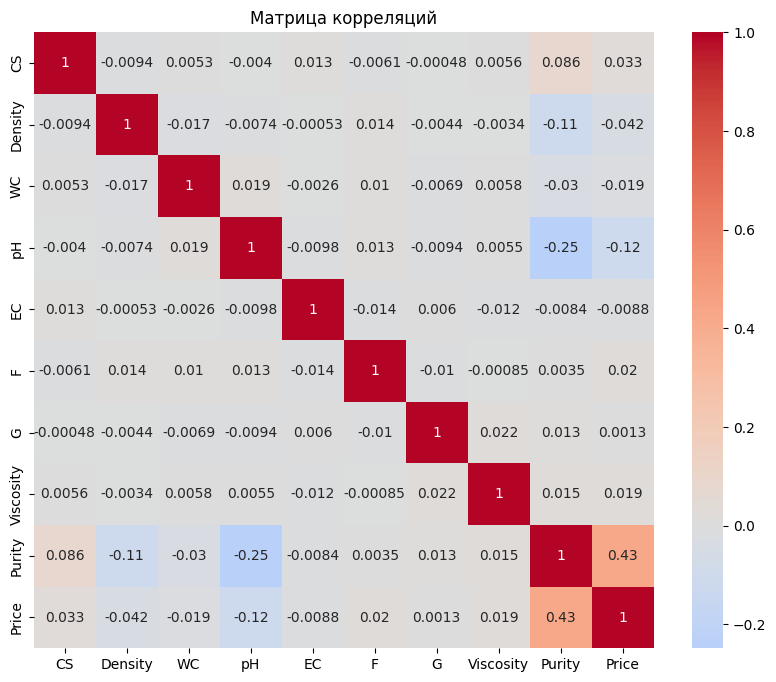

In [593]:
num_df = honey_df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

Начнем создавать новые features

Числовые фичи

In [594]:
def create_num_features(df):
    new_df = df.copy()
    new_df['CS*Density'] = df['CS'] * df['Density']
    new_df['pH*EC'] = df['pH'] * df['EC']
    new_df['F/G'] = df['F'] / (df['G'] + 1e-9)
    new_df['WC*pH'] = df['WC'] * df['pH']
    new_df['Density*Viscosity/WC'] = df['Density'] * df['Viscosity'] / (df['WC'] + 1e-9)
    new_df['G/F'] = df['G'] / (df['F'] + 1e-9)
    new_df['EC/pH'] = df['EC'] / (df['pH'] + 1e-9)
    new_df['F+G'] = df['F'] + df['G']
    new_df['F/G'] = df['F'] / df['G']
    new_df['F*G/WC'] = df['F'] * df['G'] / (df['WC'] + 1e-9)
    new_df['log_Viscosity'] = np.log1p(df['Viscosity'])
    new_df['log_Total_Sugars'] = np.log1p(df['F'] + df['G'])
    new_df['pH_deviation_ideal'] = abs(df['pH'] - 4.0)
    new_df['WC_deviation_ideal'] = abs(df['WC'] - 18.6)
    new_df['Density_deviation'] = abs(df['Density'] - 1.42)
    new_df['log1p(CS*Density*WC*pH*EC*F*G*Viscosity)'] = np.log1p(df['CS'] * df['Density'] * df['WC'] * df['pH'] * df['EC'] * df['F'] * df['G'] * df['Viscosity'])
    for col in ['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity']:
        new_df[f'{col}_to_mean'] = df[col] / df[col].mean()
        
    return new_df

Создадим категориальные фичи

In [595]:
def create_cat_features(df):
    new_df = df.copy()
    new_df['WC_Category'] = pd.cut(df['WC'], 
                           bins=[12, 17, 19, 25],
                           labels=['low', 'medium', 'high'])
    new_df['Density_Category'] = pd.cut(df['Density'],
                                bins=[1.21, 1.45, 1.65, 1.86],
                                labels=['light', 'medium', 'dense'])
    new_df['pH_Category'] = pd.cut(df['pH'],
                           bins=[2.5, 3.9, 5.1, 7.5],
                           labels=['acidic', 'normal', 'alkaline'])
    
    cat_cols = ['Pollen_analysis', 'WC_Category', 'Density_Category', 'pH_Category']

    for col in cat_cols:
        dummies = pd.get_dummies(new_df[col], prefix=col, dtype=int, drop_first=True)
        new_df = pd.concat([new_df, dummies], axis=1)
    new_df = new_df.drop(columns=cat_cols)
    
    return new_df
    

Применим функции выше и построим матрицу корреляций

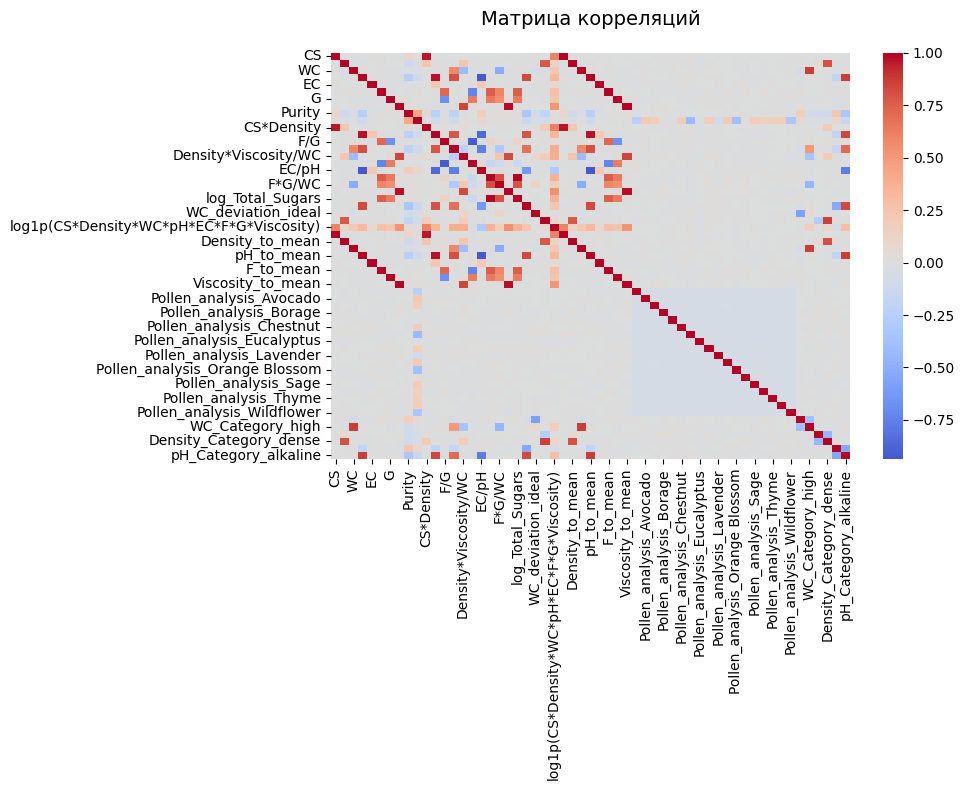

In [596]:
new_honey_df = create_num_features(honey_df)
new_honey_df = create_cat_features(new_honey_df)

corr_matrix = new_honey_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Матрица корреляций', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Посмотрим на результат после создания новых фич

In [597]:
from sklearn.discriminant_analysis import StandardScaler


honey_X = new_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = new_honey_df[['Purity', 'Price']]

scaler = StandardScaler()
honey_X = scaler.fit_transform(honey_X)

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [598]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = KNeighborsRegressor()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished



Результаты кросс-валидации для Purity модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.002579    0.074172  KNeighborsRegressor()     -0.017411      -0.131951   
1  0.002435    0.078960  KNeighborsRegressor()     -0.017319      -0.131602   
2  0.006191    0.075442  KNeighborsRegressor()     -0.017378      -0.131826   
3  0.002654    0.072540  KNeighborsRegressor()     -0.017595      -0.132648   
4  0.002658    0.080114  KNeighborsRegressor()     -0.017433      -0.132036   

   test_neg_mae   test_r2  
0     -0.110495  0.091918  
1     -0.111079  0.117016  
2     -0.111052  0.115385  
3     -0.111731  0.098413  
4     -0.111681  0.098484  

Результаты кросс-валидации для Price модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.002528    0.058315  KNeighborsRegressor() -10336.558930    -101.668869   
1  0.004712    0.061962  KNeighborsRegressor()  -9876.825370     -99.382219   
2  0.002715    0.061219  KN

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Замерим результат на тестовой выборке

In [599]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.1632715534542991
mse: 0.016196031759999997
rmse: 0.1272636309398722
mae: 0.10928059999999999

Test_score Price:
r2: 0.8172516154245667
mse: 9903.085580299761
rmse: 99.51424812708862
mae: 80.2631674


| Метрика | Purity           | Price              |
|---------|------------------|--------------------|
| r2      | 0.3923430935706036 | 0.8727151030030451 |
| mse     | 0.011769773940824103 | 6926.60965811647   |
| rmse    | 0.10848858898899968 | 83.22625582180464  |
| mae     | 0.08751433815372824 | 63.4564836046066   |

Попробуем еще улучшить, подобрав гиперпараметры

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def find_best_hyperparameters_cv(X, y, n_trials=10, cv=5, scoring='r2', n_jobs=-1):
    def objective(trial):
        n_neighbors = trial.suggest_int('n_neighbors', 3, 10)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 3)
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
        
        model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p,
            metric=metric,
            n_jobs=n_jobs
        )
        
        return cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    return study.best_params


best_params = {
    'Purity': {'n_neighbors': 5, 'weights': 'distance', 'p': 3, 'metric': 'manhattan'},
    'Price': {'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'metric': 'minkowski'}
}

best_models = {}

for model_name in ['Purity', 'Price']:
    if not best_params.get(model_name):
        best_params[model_name] = find_best_hyperparameters_cv(
                honey_X_train,
                honey_y_train[model_name],
                n_trials=10,
                cv=5,
                scoring='neg_mean_absolute_error'
        )
    if not best_models.get(model_name):
        best_models[model_name] = KNeighborsRegressor(**best_params[model_name])

Обучим модель с подобранными гиперпараметрами

In [601]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

results = {}


for model_name, model in best_models.items():
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished



Результаты кросс-валидации для Purity модели:
   fit_time  score_time                                          estimator  \
0  0.001808    0.380731  KNeighborsRegressor(metric='manhattan', p=3, w...   
1  0.003955    0.392689  KNeighborsRegressor(metric='manhattan', p=3, w...   
2  0.002882    0.376751  KNeighborsRegressor(metric='manhattan', p=3, w...   
3  0.002673    0.386339  KNeighborsRegressor(metric='manhattan', p=3, w...   
4  0.002382    0.383353  KNeighborsRegressor(metric='manhattan', p=3, w...   

   test_neg_mse  test_neg_rmse  test_neg_mae   test_r2  
0     -0.013499      -0.116183     -0.094933  0.295972  
1     -0.013437      -0.115918     -0.094698  0.314939  
2     -0.013494      -0.116165     -0.095767  0.313091  
3     -0.013697      -0.117032     -0.096502  0.298196  
4     -0.013297      -0.115311     -0.095090  0.312406  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                                estimator  \
0  0.001416    0.058715  KNe

Замерим на тестовой выборке

In [602]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))
    

Test_score Purity:
r2: 0.3516009629268976
mse: 0.012550656597063366
rmse: 0.11202971300982327
mae: 0.09398558168673841

Test_score Price:
r2: 0.8187771887471178
mse: 9820.415174170892
rmse: 99.09800792231341
mae: 79.6246019305994


 | Метрика | Purity               | Price                 |
|---------|----------------------|-----------------------|
| r2      | 0.47624580342888856  | 0.8747590102322818    |
| mse     | 0.01014465305828986  | 6815.383991220078     |
| rmse    | 0.10072066847618646  | 82.55533896254123     |
| mae     | 0.0809685907325188   | 62.65626416473035     |

### 4.  Имплементация алгоритма машинного обучения 

4.1. Задача регрессии

In [603]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.neighbors import BallTree, KDTree


class LabKNeighborsRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_neighbors=5, weights='uniform', 
                 p=2, metric='minkowski', n_jobs=None, 
                 leaf_size=30, algorithm='auto'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        self.metric = metric
        self.n_jobs = n_jobs
        self.leaf_size = leaf_size
        self.algorithm = algorithm
        
        self.kd_tree_metrics = {
            'euclidean', 'manhattan', 'chebyshev', 'minkowski',
            'cityblock', 'l1', 'l2', 'infinity'
        }
        
        self.ball_tree_metrics = {
            'cosine', 'haversine', 'hamming', 
            'jaccard', 'dice', 'matching',
            'mahalanobis', 'seuclidean', 'wminkowski'
        }
        
        self.brute_only_metrics = {
            'canberra', 'braycurtis', 'correlation', 'sqeuclidean',
            'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener',
            'sokalsneath', 'yule'
        }
    
    def _select_algorithm(self):
        if self.algorithm != 'auto':
            return self.algorithm
            
        if self.metric in self.brute_only_metrics:
            return 'brute'
            
        if self.metric in self.kd_tree_metrics:
            if self.metric == 'minkowski':
                if self.p == 1 or self.p == 2 or self.p == np.inf:
                    return 'kd_tree'
                else:
                    return 'ball_tree'
            return 'kd_tree'
        elif self.metric in self.ball_tree_metrics:
            return 'ball_tree'
        else:
            return 'brute'
    
    def _compute_distance(self, x1, x2):
        if self.metric == 'euclidean' or self.metric == 'l2':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan' or self.metric == 'cityblock' or self.metric == 'l1':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev' or self.metric == 'infinity':
            return np.max(np.abs(x1 - x2))
        elif self.metric == 'minkowski':
            return np.power(np.sum(np.power(np.abs(x1 - x2), self.p)), 1/self.p)
        elif self.metric == 'cosine':
            dot_product = np.dot(x1, x2)
            norm1 = np.linalg.norm(x1)
            norm2 = np.linalg.norm(x2)
            return 1 - dot_product / (norm1 * norm2 + 1e-10)
        elif self.metric == 'hamming':
            return np.mean(x1 != x2)
        elif self.metric == 'sqeuclidean':
            return np.sum((x1 - x2) ** 2)
        elif self.metric == 'canberra':
            numerator = np.abs(x1 - x2)
            denominator = np.abs(x1) + np.abs(x2)
            return np.sum(np.divide(numerator, denominator, 
                                   out=np.zeros_like(numerator), 
                                   where=denominator!=0))
        elif self.metric == 'braycurtis':
            return np.sum(np.abs(x1 - x2)) / np.sum(np.abs(x1 + x2))
        else:
            return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _brute_neighbors(self, X_query, n_neighbors=None):
        if n_neighbors is None:
            n_neighbors = self.n_neighbors
        
        n_query = X_query.shape[0]
        n_train = self.X_.shape[0]
        
        distances = np.zeros((n_query, n_train))
        
        for i in range(n_query):
            if self.metric == 'euclidean' or self.metric == 'l2':
                distances[i, :] = np.sqrt(np.sum((self.X_ - X_query[i]) ** 2, axis=1))
            elif self.metric == 'manhattan' or self.metric == 'cityblock' or self.metric == 'l1':
                distances[i, :] = np.sum(np.abs(self.X_ - X_query[i]), axis=1)
            elif self.metric == 'chebyshev' or self.metric == 'infinity':
                distances[i, :] = np.max(np.abs(self.X_ - X_query[i]), axis=1)
            elif self.metric == 'minkowski':
                distances[i, :] = np.power(
                    np.sum(np.power(np.abs(self.X_ - X_query[i]), self.p), axis=1),
                    1/self.p
                )
            elif self.metric == 'cosine':
                dot_products = np.dot(self.X_, X_query[i])
                norms_X = np.linalg.norm(self.X_, axis=1)
                norm_query = np.linalg.norm(X_query[i])
                distances[i, :] = 1 - dot_products / (norms_X * norm_query + 1e-10)
            elif self.metric == 'sqeuclidean':
                distances[i, :] = np.sum((self.X_ - X_query[i]) ** 2, axis=1)
            else:
                for j in range(n_train):
                    distances[i, j] = self._compute_distance(X_query[i], self.X_[j])
        
        if n_neighbors == 1:
            indices = np.argmin(distances, axis=1).reshape(-1, 1)
            neighbor_distances = np.min(distances, axis=1).reshape(-1, 1)
        else:
            partition_indices = np.argpartition(distances, n_neighbors, axis=1)[:, :n_neighbors]

            indices = np.zeros((n_query, n_neighbors), dtype=int)
            neighbor_distances = np.zeros((n_query, n_neighbors))
            
            for i in range(n_query):
                k_distances = distances[i, partition_indices[i]]
                
                sorted_k_indices = np.argsort(k_distances)
                
                indices[i] = partition_indices[i][sorted_k_indices]
                neighbor_distances[i] = k_distances[sorted_k_indices]
        
        return neighbor_distances, indices
    
    def _build_tree(self, X):
        selected_algorithm = self._select_algorithm()
        
        if selected_algorithm == 'kd_tree':
            try:
                if self.metric == 'manhattan' or self.metric == 'l1':
                    metric_name = 'cityblock'
                    tree_kwargs = {'p': 1} if self.metric == 'minkowski' else {}
                elif self.metric == 'euclidean' or self.metric == 'l2':
                    metric_name = 'euclidean'
                    tree_kwargs = {'p': 2} if self.metric == 'minkowski' else {}
                elif self.metric == 'chebyshev' or self.metric == 'infinity':
                    metric_name = 'chebyshev'
                    tree_kwargs = {}
                elif self.metric == 'minkowski':
                    metric_name = 'minkowski'
                    tree_kwargs = {'p': self.p}
                else:
                    metric_name = self.metric
                    tree_kwargs = {}
                
                if tree_kwargs:
                    self.tree_ = KDTree(X, leaf_size=self.leaf_size, 
                                       metric=metric_name, **tree_kwargs)
                else:
                    self.tree_ = KDTree(X, leaf_size=self.leaf_size, 
                                       metric=metric_name)
                    
                self.tree_type_ = 'kd_tree'
                
            except (ValueError, TypeError) as e:
                print(f"KDTree не поддерживает метрику {self.metric} с параметрами: {e}")
                print("Пробуем BallTree...")
                selected_algorithm = 'ball_tree'
        
        if selected_algorithm == 'ball_tree' or (selected_algorithm == 'kd_tree' and not hasattr(self, 'tree_')):
            try:
                if self.metric == 'manhattan' or self.metric == 'l1':
                    metric_name = 'cityblock'
                    tree_kwargs = {'p': 1} if self.metric == 'minkowski' else {}
                elif self.metric == 'euclidean' or self.metric == 'l2':
                    metric_name = 'euclidean'
                    tree_kwargs = {'p': 2} if self.metric == 'minkowski' else {}
                elif self.metric == 'chebyshev' or self.metric == 'infinity':
                    metric_name = 'chebyshev'
                    tree_kwargs = {}
                elif self.metric == 'minkowski':
                    metric_name = 'minkowski'
                    tree_kwargs = {'p': self.p}
                else:
                    metric_name = self.metric
                    tree_kwargs = {}
                
                if tree_kwargs:
                    self.tree_ = BallTree(X, leaf_size=self.leaf_size, 
                                         metric=metric_name, **tree_kwargs)
                else:
                    self.tree_ = BallTree(X, leaf_size=self.leaf_size, 
                                         metric=metric_name)
                    
                self.tree_type_ = 'ball_tree'
                
            except (ValueError, TypeError) as e:
                print(f"BallTree не поддерживает метрику {self.metric}: {e}")
                print("Используем brute force...")
                self.tree_ = None
                self.tree_type_ = 'brute'
                
        elif selected_algorithm == 'brute' or not hasattr(self, 'tree_'):
            self.tree_ = None
            self.tree_type_ = 'brute'
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        self.X_ = X
        self.y_ = y
        
        self._build_tree(X)
        
        return self
    
    def kneighbors(self, X, n_neighbors=None, return_distance=True):
        check_is_fitted(self, ['X_', 'y_', 'tree_type_'])
        X = check_array(X)
        
        if n_neighbors is None:
            n_neighbors = self.n_neighbors
        elif n_neighbors <= 0:
            raise ValueError("n_neighbors должен быть положительным числом")
        
        if n_neighbors > len(self.X_):
            raise ValueError(
                f"n_neighbors ({n_neighbors}) не может быть больше "
                f"количества обучающих образцов ({len(self.X_)})"
            )
        
        if self.tree_type_ in ['kd_tree', 'ball_tree'] and self.tree_ is not None:
            try:
                distances, indices = self.tree_.query(
                    X, 
                    k=n_neighbors,
                    return_distance=return_distance
                )
                if n_neighbors == 1:
                    distances = distances.reshape(-1, 1)
                    indices = indices.reshape(-1, 1)
            except Exception as e:
                print(f"Ошибка при поиске соседей с деревом: {e}")
                print("Переключаюсь на brute force...")
                distances, indices = self._brute_neighbors(X, n_neighbors)
        else: 
            distances, indices = self._brute_neighbors(X, n_neighbors)
        
        if return_distance:
            return distances, indices
        return indices
    
    def predict(self, X):
        check_is_fitted(self, ['X_', 'y_'])
        X = check_array(X)
        
        distances, indices = self.kneighbors(X, return_distance=True)
        
        predictions = np.zeros(len(X))
        
        for i in range(len(X)):
            neighbor_indices = indices[i]
            neighbor_distances = distances[i]
            neighbor_values = self.y_[neighbor_indices]
            
            if self.weights == 'uniform':
                predictions[i] = np.mean(neighbor_values)
                
            elif self.weights == 'distance':
                zero_distance_mask = neighbor_distances == 0
                if np.any(zero_distance_mask):
                    zero_indices = np.where(zero_distance_mask)[0]
                    predictions[i] = neighbor_values[zero_indices[0]]
                else:
                    weights = 1.0 / (neighbor_distances + 1e-10)
                    predictions[i] = np.average(neighbor_values, weights=weights)
                    
            else:
                raise ValueError(f"Неизвестный метод взвешивания: {self.weights}")
        
        return predictions
    
    def score(self, X, y):
        from sklearn.metrics import r2_score
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

1. Простой бейзлайн

In [604]:
honey_X = onehot_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = onehot_honey_df[['Purity', 'Price']]
honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [605]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LabKNeighborsRegressor()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)


Результаты кросс-валидации для Purity модели:
   fit_time  score_time                 estimator  test_neg_mse  \
0  0.014978    0.024954  LabKNeighborsRegressor()     -0.023554   
1  0.018347    0.021580  LabKNeighborsRegressor()     -0.024016   
2  0.014876    0.023740  LabKNeighborsRegressor()     -0.023314   
3  0.016986    0.024157  LabKNeighborsRegressor()     -0.023389   
4  0.013214    0.025429  LabKNeighborsRegressor()     -0.022645   

   test_neg_rmse  test_neg_mae   test_r2  
0      -0.153472     -0.131719 -0.228467  
1      -0.154972     -0.134069 -0.224426  
2      -0.152688     -0.131735 -0.186747  
3      -0.152933     -0.132336 -0.198421  
4      -0.150482     -0.129536 -0.171009  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                 estimator  test_neg_mse  \
0  0.014517    0.023613  LabKNeighborsRegressor() -62878.308844   
1  0.017256    0.026896  LabKNeighborsRegressor() -64480.636245   
2  0.016409    0.025629  LabKNeighborsRegress

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [606]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: -0.11477056946853548
mse: 0.02157792008
rmse: 0.1468942479472903
mae: 0.1274826

Test_score Price:
r2: -0.14823846826088594
mse: 62222.7323332984
rmse: 249.44484827973176
mae: 205.3528756


| Метрика | Purity               | Price                 |
|---------|----------------------|-----------------------|
| r2      | -0.05486133154132711 | -0.11933013684360216  |
| mse     | 0.020431725995038418 | 60911.8844372181      |
| rmse    | 0.14293958862064218  | 246.80333149537933    |
| mae     | 0.1230336378854803   | 201.98818649079283    |

Улучшим бейзлайн

In [607]:
new_honey_df = create_num_features(honey_df)
new_honey_df = create_cat_features(new_honey_df)

honey_X = new_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = new_honey_df[['Purity', 'Price']]

scaler = StandardScaler()
honey_X = scaler.fit_transform(honey_X)

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Посмотрим, что получилось после создания новых фич и применения StandardScaler

In [608]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LabKNeighborsRegressor()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time                 estimator  test_neg_mse  \
0  0.025643    0.834131  LabKNeighborsRegressor()     -0.017411   
1  0.032238    0.844231  LabKNeighborsRegressor()     -0.017319   
2  0.030951    0.811888  LabKNeighborsRegressor()     -0.017378   
3  0.028191    0.826999  LabKNeighborsRegressor()     -0.017595   
4  0.026061    0.824949  LabKNeighborsRegressor()     -0.017433   

   test_neg_rmse  test_neg_mae   test_r2  
0      -0.131951     -0.110495  0.091918  
1      -0.131602     -0.111079  0.117016  
2      -0.131826     -0.111052  0.115385  
3      -0.132648     -0.111731  0.098413  
4      -0.132036     -0.111681  0.098484  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                 estimator  test_neg_mse  \
0  0.027325    0.771177  LabKNeighborsRegressor() -10336.558930   
1  0.032033    0.776363  LabKNeighborsRegressor()  -9876.825370   
2  0.030320    0.748639  LabKNeighborsRegress

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [609]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.1632715534542991
mse: 0.016196031759999997
rmse: 0.1272636309398722
mae: 0.10928059999999999

Test_score Price:
r2: 0.8172516154245667
mse: 9903.085580299761
rmse: 99.51424812708862
mae: 80.2631674


| Метрика | Purity           | Price              |
|---------|------------------|--------------------|
| r2      | 0.3923430935706036 | 0.8727151030030451 |
| mse     | 0.011769773940824103 | 6926.60965811647   |
| rmse    | 0.10848858898899968 | 83.22625582180464  |
| mae     | 0.08751433815372824 | 63.4564836046066   |

Попробуем еще улучшить, подобрав гиперпараметры

In [610]:
def find_best_hyperparameters_cv(X, y, n_trials=10, cv=5, scoring='r2', n_jobs=-1):
    def objective(trial):
        n_neighbors = trial.suggest_int('n_neighbors', 3, 10)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 3)
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
        
        model = LabKNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p,
            metric=metric,
            n_jobs=n_jobs
        )
        
        return cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    return study.best_params


best_params = {
    'Purity': {'n_neighbors': 5, 'weights': 'distance', 'p': 3, 'metric': 'manhattan'},
    'Price': {'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'metric': 'minkowski'}
}

best_models = {}

for model_name in ['Purity', 'Price']:
    if not best_params.get(model_name):
        best_params[model_name] = find_best_hyperparameters_cv(
                honey_X_train,
                honey_y_train[model_name],
                n_trials=10,
                cv=5,
                scoring='neg_mean_absolute_error'
        )
    if not best_models.get(model_name):
        best_models[model_name] = LabKNeighborsRegressor(**best_params[model_name])

Обучим модель с подобранными гиперпараметрами

In [611]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

results = {}


for model_name, model in best_models.items():
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time                                          estimator  \
0  0.039104    0.842459  LabKNeighborsRegressor(metric='manhattan', p=3...   
1  0.034622    0.866958  LabKNeighborsRegressor(metric='manhattan', p=3...   
2  0.032673    0.896884  LabKNeighborsRegressor(metric='manhattan', p=3...   
3  0.028268    0.893990  LabKNeighborsRegressor(metric='manhattan', p=3...   
4  0.030205    0.882252  LabKNeighborsRegressor(metric='manhattan', p=3...   

   test_neg_mse  test_neg_rmse  test_neg_mae   test_r2  
0     -0.013499      -0.116183     -0.094933  0.295972  
1     -0.013437      -0.115918     -0.094698  0.314939  
2     -0.013494      -0.116165     -0.095767  0.313091  
3     -0.013697      -0.117032     -0.096502  0.298196  
4     -0.013297      -0.115311     -0.095090  0.312406  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                                   estimator  \
0  0.028258    0.807930  

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Замерим на тестовой выборке

In [612]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.35160096292691656
mse: 0.012550656597062998
rmse: 0.11202971300982163
mae: 0.09398558168673961

Test_score Price:
r2: 0.8187771887470898
mse: 9820.415174172409
rmse: 99.09800792232107
mae: 79.62460193061648


 | Метрика | Purity               | Price                 |
|---------|----------------------|-----------------------|
| r2      | 0.47624580342888856  | 0.8747590102322818    |
| mse     | 0.01014465305828986  | 6815.383991220078     |
| rmse    | 0.10072066847618646  | 82.55533896254123     |
| mae     | 0.0809685907325188   | 62.65626416473035     |